In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, recall_score

from imblearn.over_sampling import SMOTE


In [2]:
# Load cleaned dataset
Financials = pd.read_csv('/Users/sa20/Desktop/Fraud-Detection-Lab/Data/Processed/cleaned_data.csv')
Financials.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,1,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,1,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,False,False,True,False


In [8]:
X = Financials.drop(columns=['isFraud']).values # all columns except isFraud will be features
y = Financials['isFraud'].values # isFraud is the target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [12]:
# Let's apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

In [19]:
# Define Confusion Matrix Plotting Function
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {title}')
    plt.show()


In [20]:
# Train Logistic Regression Model
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train_res, y_train_res)

#LogisticRegression()

LogisticRegression(class_weight='balanced')

In [26]:
# Prediction + Evaluation
y_pred_logreg = logreg.predict(X_test)
f1_logreg = f1_score(y_test, y_pred_logreg)

print("Logistic Regression F1_Score: ", f1_logreg)

Logistic Regression F1_Score:  0.04783797369034046


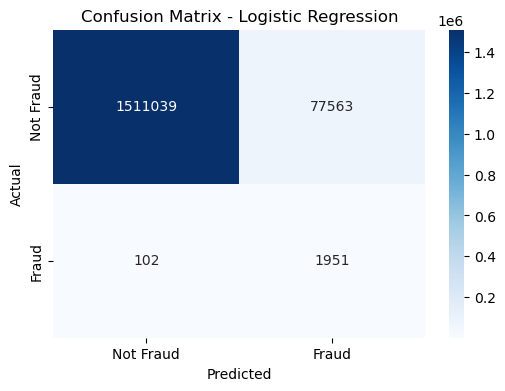

In [22]:
# Confusion Matrix
plot_confusion_matrix(y_test, y_pred_logreg, 'Logistic Regression')

In [24]:
# Classification Report
print("Classification Report: Logistic Regression: ")
print(classification_report(y_test, y_pred_logreg))

Classification Report: Logistic Regression: 
              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1588602
           1       0.02      0.95      0.05      2053

    accuracy                           0.95   1590655
   macro avg       0.51      0.95      0.51   1590655
weighted avg       1.00      0.95      0.97   1590655

